# WIP analysis logic

### Chunk

In [6]:
opinion = "I don't really like my job, even though it pays well. The main reason is that I'm working for someone else's vision and goals, which leaves me feeling dependent and unfulfilled. While I appreciate that I'm improving my skills, I would prefer to pursue my own ideas and lead projects that reflect my vision. The French hiring system complicates things further since it tends to limit experimentation and openness to diverse backgrounds. This environment adds to my frustration, as it makes it harder to explore and implement my innovative ideas."

In [7]:
import spacy

spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")

chunks = []
doc = nlp(opinion)
chunks.extend([sent.text.strip() for sent in doc.sents])

print(chunks)

# extract substance and topic from opinion

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
["I don't really like my job, even though it pays well.", "The main reason is that I'm working for someone else's vision and goals, which leaves me feeling dependent and unfulfilled.", "While I appreciate that I'm improving my skills, I would prefer to pursue my own ideas and lead projects that reflect my vision.", 'The French hiring system complicates things further since it tends to limit experimentation and openness to diverse backgrounds.', 'This environment adds to my frustration, as it makes it harder to expl

### Embed

In [9]:
from torch.optim.lr_scheduler import LRScheduler
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = chunks

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
# [3, 384]

# # 3. Calculate the embedding similarities
# similarities = model.similarity(embeddings, embeddings)
# print(similarities)
# # tensor([[1.0000, 0.6660, 0.1046],
# #         [0.6660, 1.0000, 0.1411],
# #         [0.1046, 0.1411, 1.0000]])

(5, 384)


### Visualize

/Users/violettedr/Programming/pollflow-vote-it-up-backend/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/violettedr/Programming/pollflow-vote-it-up-backend/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/violettedr/Programming/pollflow-vote-it-up-backend/.venv/lib/python3.12/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/Users/violettedr/Programming/pollflow-vote-it-up-backend/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/violettedr/Programming/pollflow-vote-it-up-backend/.venv/lib/python3.1

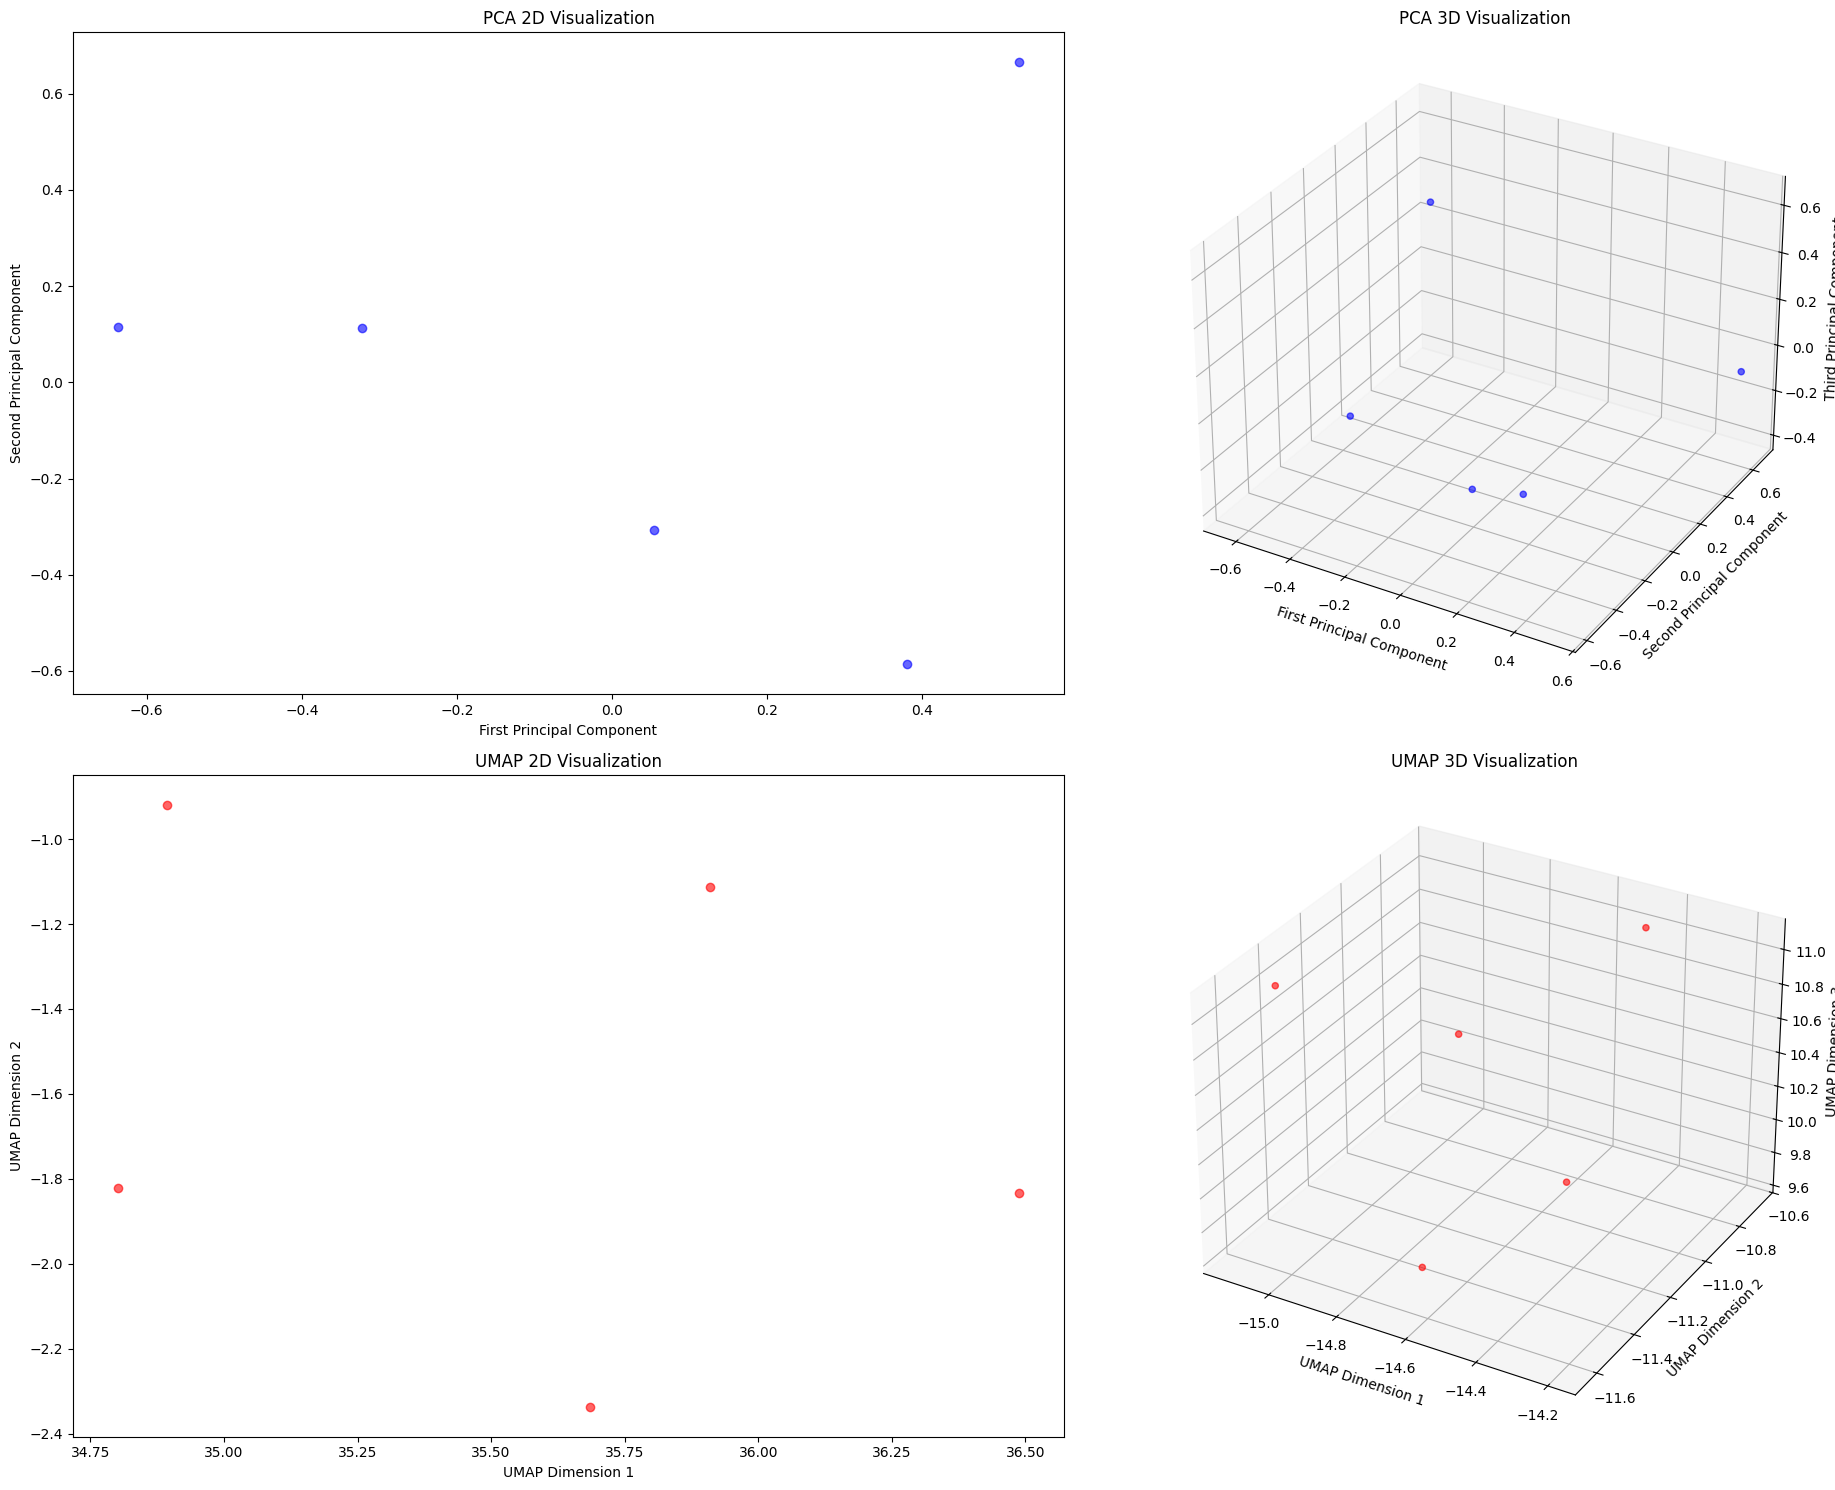

PCA Explained Variance Ratio:
2D PCA: 62.20%
3D PCA: 83.39%


In [16]:
# PCA & UMAP

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import umap
import seaborn as sns

# Assuming 'embeddings' is your 384-dimensional embeddings from sentence-transformers
# and 'sentences' is your list of original sentences

# 1. PCA for 2D and 3D visualization
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

embeddings_2d_pca = pca_2d.fit_transform(embeddings)
embeddings_3d_pca = pca_3d.fit_transform(embeddings)

# 2. UMAP for 2D and 3D visualization
reducer_2d = umap.UMAP(n_components=2, random_state=42)
reducer_3d = umap.UMAP(n_components=3, random_state=42)

embeddings_2d_umap = reducer_2d.fit_transform(embeddings)
embeddings_3d_umap = reducer_3d.fit_transform(embeddings)

# Create a figure with 4 subplots
plt.figure(figsize=(20, 15))

# 1. PCA 2D
plt.subplot(2, 2, 1)
plt.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], c='blue', alpha=0.6)
plt.title('PCA 2D Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# 2. PCA 3D
ax = plt.subplot(2, 2, 2, projection='3d')
ax.scatter(embeddings_3d_pca[:, 0], embeddings_3d_pca[:, 1], embeddings_3d_pca[:, 2], c='blue', alpha=0.6)
ax.set_title('PCA 3D Visualization')
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

# 3. UMAP 2D
plt.subplot(2, 2, 3)
plt.scatter(embeddings_2d_umap[:, 0], embeddings_2d_umap[:, 1], c='red', alpha=0.6)
plt.title('UMAP 2D Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# 4. UMAP 3D
ax = plt.subplot(2, 2, 4, projection='3d')
ax.scatter(embeddings_3d_umap[:, 0], embeddings_3d_umap[:, 1], embeddings_3d_umap[:, 2], c='red', alpha=0.6)
ax.set_title('UMAP 3D Visualization')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')

plt.tight_layout()
plt.show()

# Print explained variance for PCA
print("PCA Explained Variance Ratio:")
print(f"2D PCA: {sum(pca_2d.explained_variance_ratio_):.2%}")
print(f"3D PCA: {sum(pca_3d.explained_variance_ratio_):.2%}")

### Cluster

In [14]:
from sklearn.cluster import DBSCAN
import numpy as np

def cluster_embeddings(embeddings, eps=0.3, min_samples=2):
    clustering = DBSCAN(metric='cosine', eps=eps, min_samples=min_samples)
    return clustering.fit_predict(embeddings)

clusters = cluster_embeddings(embeddings)
print(clusters)

# [-1 -1 -1 -1 -1] all noise..... they are all different

[-1 -1 -1 -1 -1]


### Labellise

In [15]:
import pandas as pd

def group_opinions_by_cluster(opinions, labels):
    df = pd.DataFrame({'opinion': opinions, 'cluster': labels})
    return df.sort_values('cluster')

grouped_opinions = group_opinions_by_cluster(chunks, clusters)
print(grouped_opinions)


                                             opinion  cluster
0  I don't really like my job, even though it pay...       -1
1  The main reason is that I'm working for someon...       -1
2  While I appreciate that I'm improving my skill...       -1
3  The French hiring system complicates things fu...       -1
4  This environment adds to my frustration, as it...       -1


### Analyze